# Projector Visualisation



In this tutorial, I wnted to share the few lines of code it takes to get the projector visualisation working!
You can check out the projector by [following this link](https://cloud.relevance.ai/dataset/clothes/deploy/projector/334fe5fb667b3a64dada/dGZJazdYNEJhUXlWSV9WXzY0NUI6aWlGRlFDaExSdzY4WGJGazB5VXRoZw/JIDu7H4BMFObnPsmfsoj/us-east-1/?utm_source=kaggle).

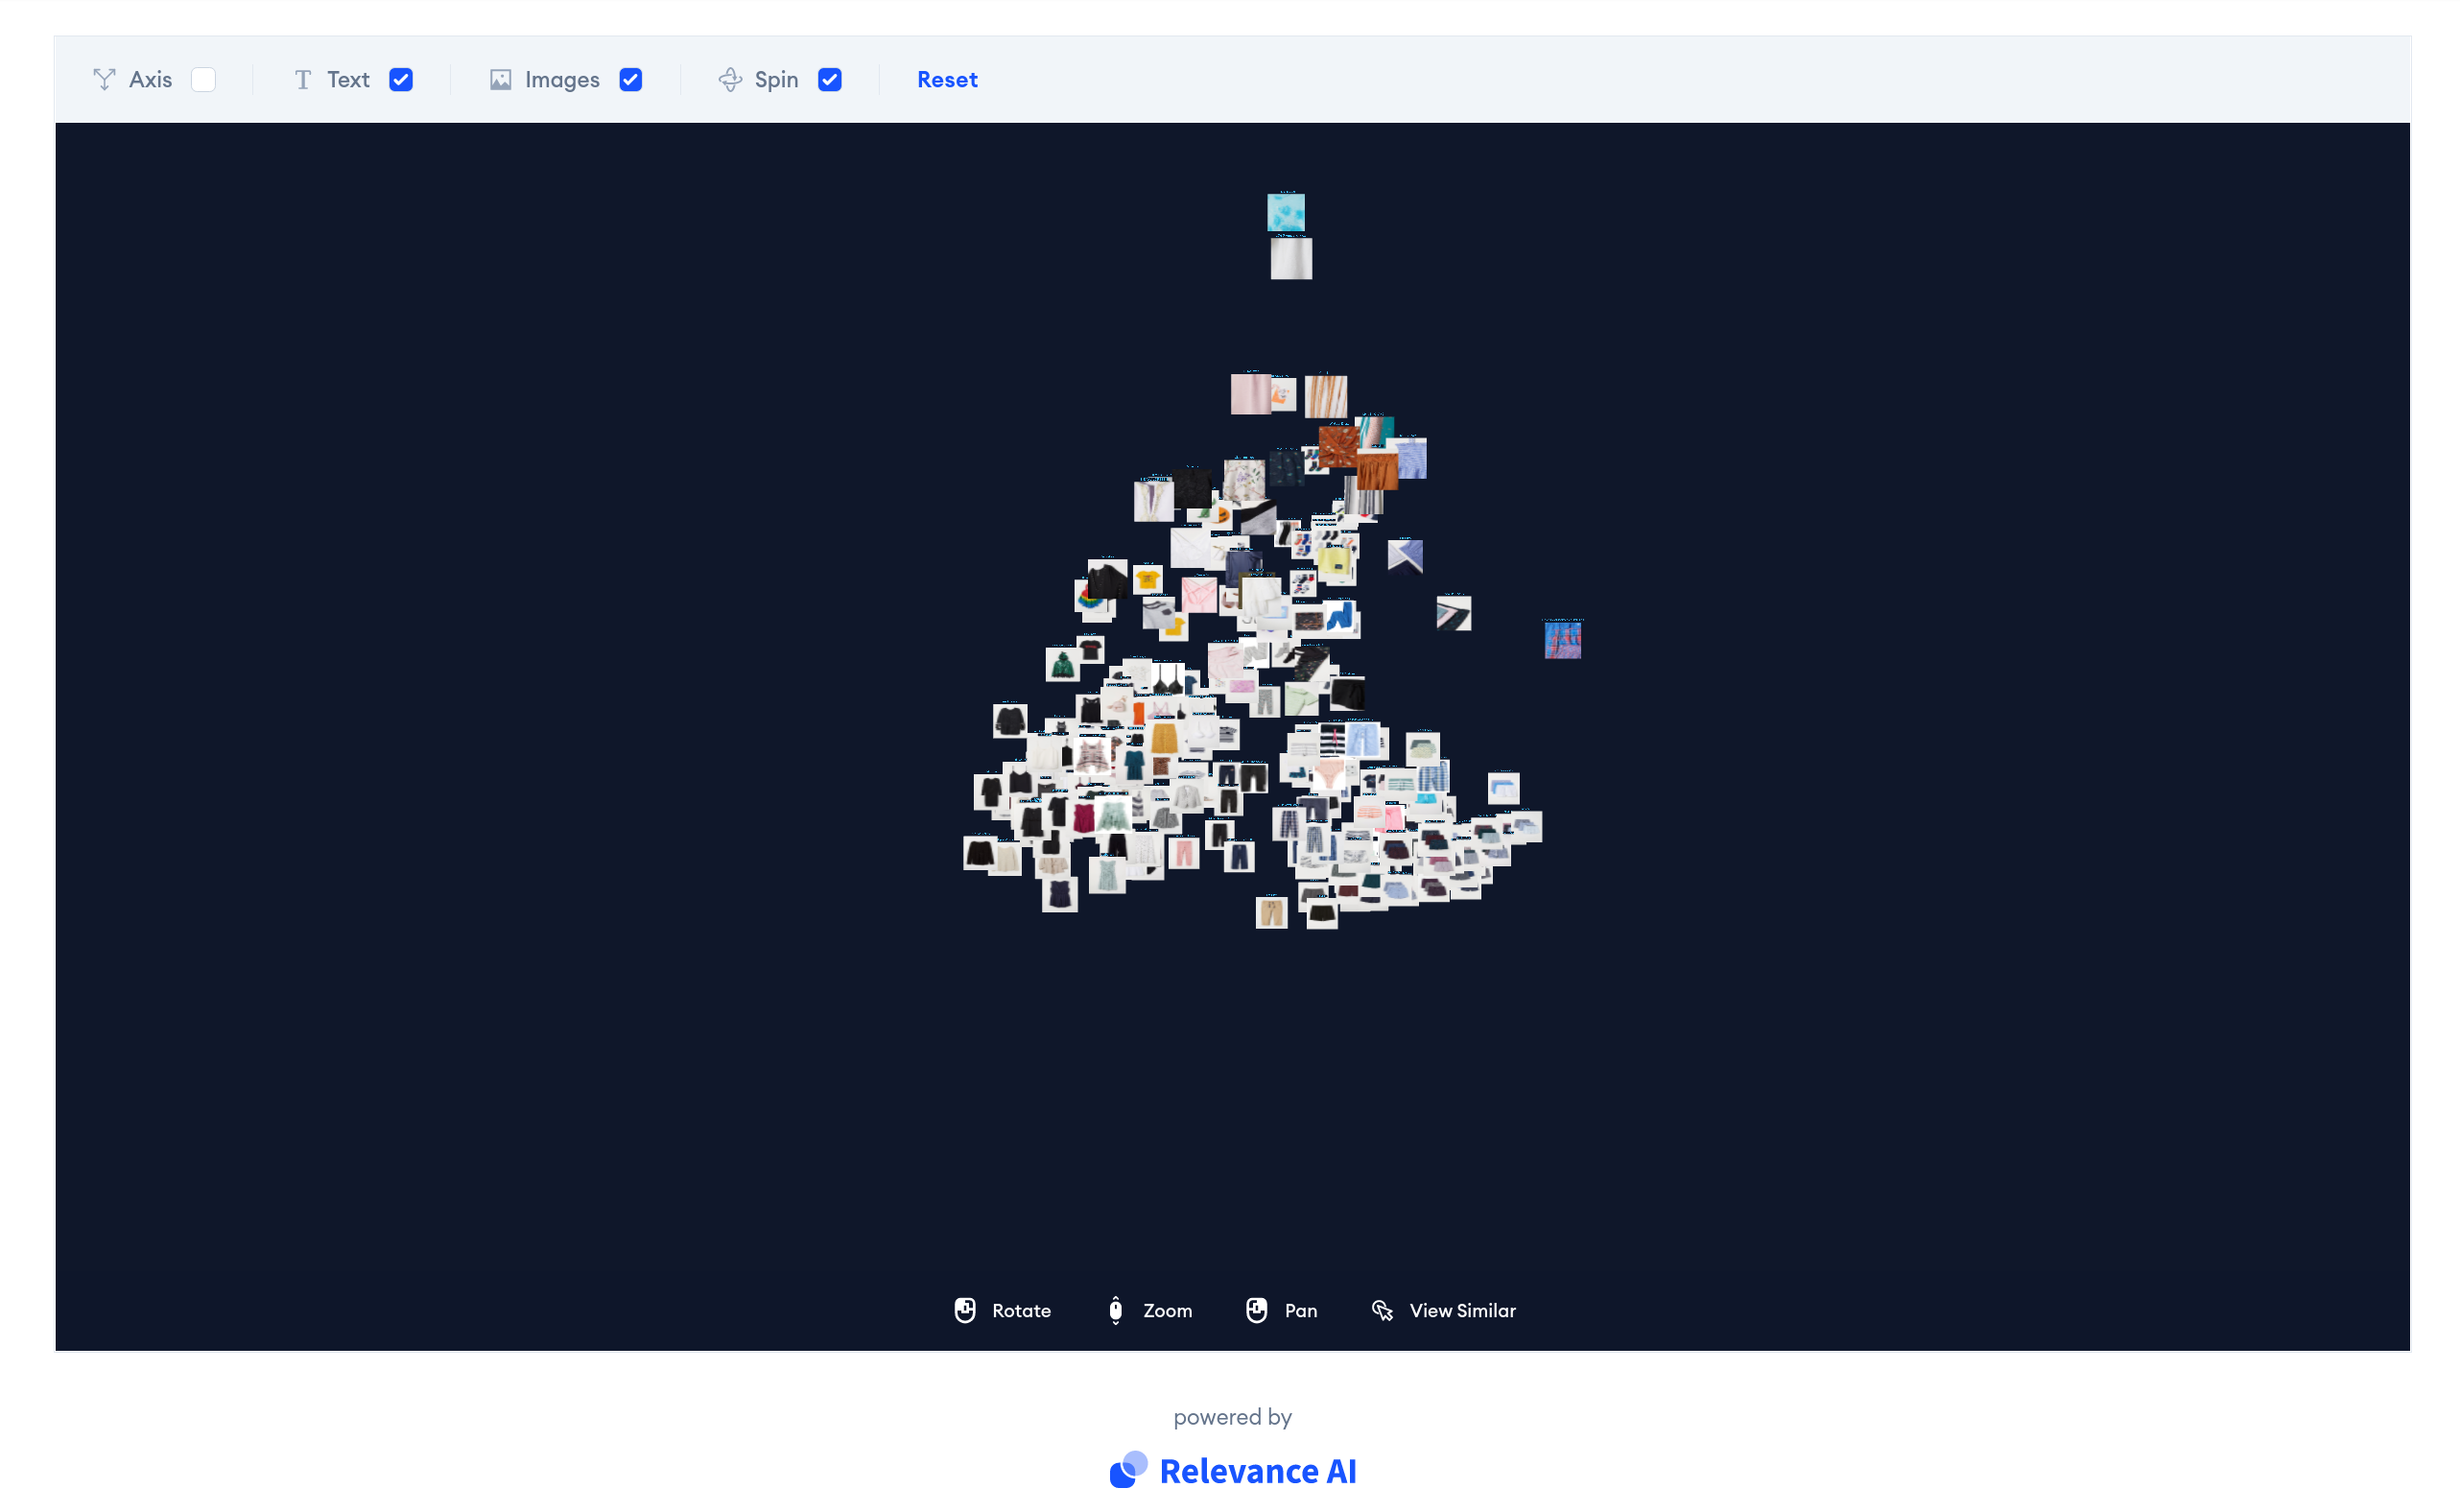


I have created a projector visualisation of a few hundred images and text in this dataset to help with visualising this dataset. 

You can check out the projector visualisation [by following this link](https://cloud.relevance.ai/dataset/clothes/deploy/projector/334fe5fb667b3a64dada/dGZJazdYNEJhUXlWSV9WXzY0NUI6aWlGRlFDaExSdzY4WGJGazB5VXRoZw/JIDu7H4BMFObnPsmfsoj/us-east-1/?utm_source=kaggle). 

I found it helps a lot with EDA when you are working with a lot of images! 

Process I followed: 
- I downloaded the data and hosted part of it online including images 
- I vectorised all the data with OpenAI's CLIP using VectorHub 
- I then ran PCA dimensionality reduction on the dataset and then projected it! 


In [ ]:
!pip install -q RelevanceAI

In [ ]:
from relevanceai import Client 
client = Client()

In [ ]:
# After downloading the data, uploaded it to Relevance AI in over to projector.
# then vectorised it using vectorHub
ds = client.Dataset("clothes")

# This was read in locally
df = pd.read_csv('articles.csv')

In [ ]:
!pip install -q vectorhub[clip]

In [ ]:
from vectorhub.bi_encoders.text_image.torch import Clip2Vec

In [ ]:
def update_image_path(docs):
    for d in docs:
        article_id = d['article_id']
        article_id = ("0" + str(article_id))[-10:]
        image_path = f"images/{str(article_id)[:3]}/{article_id}.jpg"
        d['image_path'] = image_path
    return docs

def encode_images(docs):
    return enc.encode_documents(['image_path'], docs)

enc.encode = enc.encode_image
docs = enc.encode_documents(["image_path"], docs)
ds.bulk_apply(
    update_image_path, 
    select_fields=['article_id'], 
    retrieve_chunksize=100
)

In [ ]:
ds.bulk_apply(encode_images, select_fields=['image_path'])

In [ ]:
# After that we then simply run our dimensionality reduction! 
ds.auto_reduce_dimensions(
    alias="pca-3", 
    vector_fields=['image_path_clip_vector_'],
    filters=[{
        'field' : 'image_url_2', 
        'filter_type' : 'exists', 
        "condition":"==",
        "condition_value":" "
    }],
    number_of_documents=1000
)

And that's it! Relevance AI will be available to users soon! If you are excited by this - feel free to [join our waitlist here!](https://auth.relevance.ai/start?utm_source=kaggle) We are launching soon and would love to get feedback! :) 